# Demo 3 - learning an image classifier

## Using the "mycoco.py" module written for assignment 2

In [1]:
import mycoco
mycoco.setmode('train')

loading annotations into memory...
Done (t=13.41s)
creating index...
index created!
loading annotations into memory...
Done (t=0.88s)
creating index...
index created!


In [2]:
toiletids = mycoco.query(['toilet'])
handbagids = mycoco.query(['handbag'])
ids = mycoco.query([['toilet'], ['handbag']], exclusive=False)

In [3]:
len(toiletids[0]), len(handbagids[0]), len(ids[0]), len(ids[1])

(3353, 6841, 3353, 6841)

In [4]:
capiter = mycoco.iter_captions([toiletids[0]], ['toilet'], batch=7)

In [5]:
next(capiter)

(['a bathroom area with tiled wall and three white urinals.',
  'a dark bathroom with three urinals near the door',
  'A group of three urinals mounted to a wall.',
  'urinals line the wall in a simple room with a green door',
  'A bathroom with urinals hanging on the wall.',
  'Each of the three bathroom stalls have trash cans beside the toilets.',
  'a view into the bathroom looking at three toilets'],
 ['toilet', 'toilet', 'toilet', 'toilet', 'toilet', 'toilet', 'toilet'])

In [6]:
imgiter = mycoco.iter_images(toiletids, ['toilet'], batch=2)

In [7]:
next(imgiter)

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(array([[[[0.74315922, 0.74315922, 0.74315922],
          [0.73858549, 0.73858549, 0.73858549],
          [0.73347843, 0.73347843, 0.73347843],
          ...,
          [0.65224902, 0.65224902, 0.65224902],
          [0.63203922, 0.63203922, 0.63203922],
          [0.64291922, 0.64291922, 0.64291922]],
 
         [[0.73767922, 0.73767922, 0.73767922],
          [0.73694118, 0.73694118, 0.73694118],
          [0.73647255, 0.73647255, 0.73647255],
          ...,
          [0.60264118, 0.60264118, 0.60264118],
          [0.58680745, 0.58680745, 0.58680745],
          [0.60516275, 0.60516275, 0.60516275]],
 
         [[0.74145294, 0.74145294, 0.74145294],
          [0.73647059, 0.73647059, 0.73647059],
          [0.73983333, 0.73983333, 0.73983333],
          ...,
          [0.60546078, 0.60546078, 0.60546078],
          [0.63726863, 0.63726863, 0.63726863],
          [0.62090588, 0.62090588, 0.62090588]],
 
         ...,
 
         [[0.59594314, 0.65476667, 0.6407902 ],
          [0.60692

In [8]:
img = next(imgiter)
img[0][0].shape

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(200, 200, 3)

In [9]:
import matplotlib.pyplot as plt

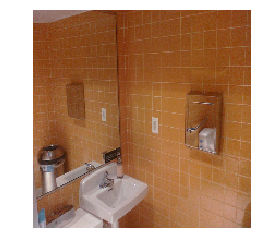

In [10]:
plt.axis('off')
plt.imshow(img[0][0])
plt.show()

## The 'zebra vs. horse' image classifier

In [11]:
zebraids, horseids = mycoco.query([['zebra'], ['horse']])

In [12]:
len(zebraids), len(horseids), len(zebraids) + len(horseids)

(1899, 2924, 4823)

In [13]:
imgs = mycoco.iter_images([zebraids, horseids], [0, 1], batch=10) 

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


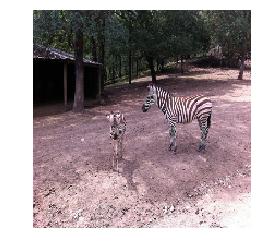

array([[[0.41181373, 0.44342745, 0.28221569],
        [0.15713725, 0.18588431, 0.15074314],
        [0.17740196, 0.19913725, 0.1809902 ],
        ...,
        [0.18345098, 0.22718627, 0.16666667],
        [0.18401765, 0.23263137, 0.19070392],
        [0.23325294, 0.24239216, 0.22317647]],

       [[0.36991569, 0.38672157, 0.31466275],
        [0.45209804, 0.46088431, 0.45094118],
        [0.2337549 , 0.26316667, 0.22837255],
        ...,
        [0.25018627, 0.27747059, 0.23253922],
        [0.23433137, 0.25786078, 0.21629216],
        [0.26351765, 0.27247059, 0.25207843]],

       [[0.48067647, 0.47655882, 0.45557843],
        [0.27205882, 0.27969608, 0.25020588],
        [0.28901961, 0.30573529, 0.29254902],
        ...,
        [0.2604902 , 0.29269608, 0.22931373],
        [0.23563725, 0.23776471, 0.22779412],
        [0.14380392, 0.13972549, 0.14076471]],

       ...,

       [[0.46217647, 0.3       , 0.34596078],
        [0.77384314, 0.60076471, 0.64653922],
        [0.74730392, 0

In [14]:
plt.close()
img = next(imgs)
plt.axis('off')
plt.imshow(img[0][2])
plt.show()
img[0][2]

In [15]:
imgs = mycoco.iter_images([zebraids, horseids], [0, 1], batch=10) 

In [16]:
from keras.layers import Input, Conv2D, Dense, Activation, Flatten, Dropout
from keras import Model
import numpy as np

Using TensorFlow backend.


In [17]:
inputlayer = Input(shape=(200,200,3))
conv2dlayer = Conv2D(10, (5,5))(inputlayer)
flattenlayer = Flatten()(conv2dlayer)
relulayer = Activation('tanh')(flattenlayer)
#dropoutlayer = Dropout(0.1)(relulayer)
#denseinitial = Dense(100, activation="tanh")(flattenlayer)
denselayer = Dense(1)(relulayer)
sigmoidlayer = Activation('sigmoid')(denselayer)
model = Model(inputlayer, sigmoidlayer)

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 10)      760       
_________________________________________________________________
flatten_1 (Flatten)          (None, 384160)            0         
_________________________________________________________________
activation_1 (Activation)    (None, 384160)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 384161    
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 384,921
Trainable params: 384,921
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### This works much better when you turn the dropout on! (And possibly use ReLU than tanh, an exercise for the reader...

In [20]:
model.fit_generator(imgs, steps_per_epoch=40, epochs=30)

Epoch 1/30


/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


40/40 [==============================] - 15s 377ms/step - loss: 6.5551 - acc: 0.5750
Epoch 2/30
40/40 [==============================] - 5s 116ms/step - loss: 6.0980 - acc: 0.6175
Epoch 3/30
40/40 [==============================] - 5s 118ms/step - loss: 6.2574 - acc: 0.6075
Epoch 4/30
40/40 [==============================] - 5s 115ms/step - loss: 6.0183 - acc: 0.6225
Epoch 5/30
40/40 [==============================] - 5s 113ms/step - loss: 6.5364 - acc: 0.5900
Epoch 6/30
40/40 [==============================] - 5s 113ms/step - loss: 6.3770 - acc: 0.6000
Epoch 7/30
40/40 [==============================] - 5s 114ms/step - loss: 5.9784 - acc: 0.6250
Epoch 8/30
40/40 [==============================] - 5s 115ms/step - loss: 6.1378 - acc: 0.6150
Epoch 9/30
40/40 [==============================] - 5s 115ms/step - loss: 6.9349 - acc: 0.5650
Epoch 10/30
40/40 [==============================] - 5s 115ms/step - loss: 6.1777 - acc: 0.6125
Epoch 11/30
40/40 [==============================] - 5s 116

### You need to test the model on other data.

In [21]:
mycoco.setmode('test')

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [22]:
zebraids_test, horseids_test = mycoco.query([['zebra'], ['horse']])

In [23]:
len(zebraids_test), len(horseids_test)

(85, 128)

In [24]:
imgs_test = mycoco.iter_images([zebraids_test, horseids_test], [0, 1], batch=200) 

In [25]:
allimgs_test = next(imgs_test)

/usr/lib64/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [26]:
predictions = model.predict(allimgs_test[0])

In [27]:
classes = [(1 if x >= 0.5 else 0) for x in predictions]

In [28]:
correct = [x[0] == x[1] for x in zip(classes, allimgs_test[1])]

In [29]:
sum(correct)

120

In [30]:
120/200.0

0.6

In [31]:
classes

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### It just guesses the majority class! Dropout matters.